Data Scientist Workshop - ex.11.2 - Adam Trentowski, 162602

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint

## Load and overview a look at dataset

In [2]:
features = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_11/files/vlagunr-Cyano.csv')

In [3]:
features.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,TN/TP,Fe,SiO4Si,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Windspeedinsitu,Depth,DIN to DIP,CyanobacteriaBiomassC
0,3.758,9.46,18.3,52.0,3.5,11.7,185.0,0.039,0.022,0.551,...,6.848,0.012,2.311,0.508,0.018,0.691,3.5,3.3,17.429,0.429
1,3.505,9.89,19.1,50.0,4.4,17.5,111.3,0.020,0.025,0.123,...,10.128,0.014,2.116,0.473,0.001,0.522,0.0,3.6,10.227,1.085
2,3.758,9.66,18.1,59.0,3.2,22.8,103.4,0.016,0.008,0.582,...,9.134,0.037,2.264,0.271,0.021,0.538,1.0,3.4,7.500,1.734
3,3.107,10.36,19.5,46.0,4.3,22.3,92.7,0.026,0.021,0.693,...,11.978,0.017,2.262,0.458,0.122,0.655,0.0,2.9,10.930,0.814
4,2.619,11.56,19.0,42.0,11.7,30.3,73.2,0.022,0.048,0.383,...,12.665,0.024,2.216,0.328,0.085,0.182,0.0,3.0,5.983,1.133


In [4]:
print(f'The shape of features is {features.shape}')

The shape of features is (156, 21)


In [5]:
features.describe()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,TN/TP,Fe,SiO4Si,ChlorophyceaeBiomassC,DiatomsBiomassC,PicoplanktonBiomassC,Windspeedinsitu,Depth,DIN to DIP,CyanobacteriaBiomassC
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,3.356955,10.180705,17.350000,86.937115,15.035256,22.421154,134.547436,0.029429,0.037071,0.573897,...,8.578487,0.032135,2.586397,0.592468,0.111782,0.619397,4.985897,3.023718,7.885410,0.709897
std,0.758863,1.078504,3.122251,35.506823,11.841528,19.531893,51.210224,0.017682,0.020047,0.173958,...,2.502329,0.020844,0.693842,0.308659,0.118384,0.338192,2.621043,0.537961,8.516169,0.530361
min,1.400000,7.620000,10.600000,29.000000,0.100000,0.700000,20.900000,0.002000,0.007000,0.022000,...,1.154000,0.002000,0.796000,0.104000,0.001000,0.080000,0.000000,1.500000,0.813000,0.016000
25%,2.800000,9.367500,16.200000,60.000000,7.475000,9.000000,99.950000,0.019000,0.024000,0.486000,...,6.821750,0.019000,2.190000,0.374000,0.029500,0.348000,3.000000,2.700000,3.132750,0.245000
50%,3.379000,9.955000,17.900000,80.000000,12.250000,15.750000,131.500000,0.026000,0.032000,0.570500,...,8.391000,0.027000,2.645500,0.535000,0.075000,0.608000,5.000000,3.200000,5.245000,0.632500
75%,3.957000,10.890000,20.100000,111.562500,19.875000,30.825000,167.700000,0.035000,0.044250,0.699250,...,10.085250,0.038250,2.919250,0.764250,0.145750,0.861750,6.850000,3.400000,8.486500,1.023000
max,4.600000,12.890000,20.700000,217.500000,88.200000,91.100000,285.100000,0.106000,0.142000,0.975000,...,20.134000,0.163000,4.227000,1.968000,0.765000,1.387000,11.500000,3.900000,49.091000,2.862000


## Split dataset to train and test datasets

In [6]:
labels = np.array(features['CyanobacteriaBiomassC'])  # labels are values we want to predict
features = features.drop('CyanobacteriaBiomassC', axis=1)
feature_list = list(features.columns)
features = np.array(features)

In [7]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=42)

In [8]:
print(f'Train features shape: {train_features.shape}')
print(f'Train labels shape: {labels.shape}')
print(f'Test features shape: {test_features.shape}')
print(f'Test labels shape: {labels.shape}')

Train features shape: (109, 20)
Train labels shape: (156,)
Test features shape: (47, 20)
Test labels shape: (156,)


## Baseline predictions

In [9]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('temp.')]

# Baseline errors and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print(f'temp. baseline error: {round(np.mean(baseline_errors), 3)}')

temp. baseline error: 16.729


## Train model on training data

In [10]:
rf = RandomForestRegressor(n_estimators=1_000, random_state=42)  # model with 1 000 decision trees
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

## Test dataset errors

In [11]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)  # calculate the absolute errors
print(f'Test dataset Mean Absolute Error (MAE): {round(np.mean(errors), 5)} degrees.')

Test dataset Mean Absolute Error (MAE): 0.33627 degrees.


In [12]:
ratio = 100 * (np.mean(errors) / test_labels.mean())
print(f'Test dataset MAE/Mean Ratio: {round(ratio, 5)} %.')

Test dataset MAE/Mean Ratio: 47.14686 %.


In [13]:
mse_test = mean_squared_error(test_labels, predictions)
print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees.')

Test dataset Mean Squared Error: 0.24026 degrees.


In [14]:
EVS = 100 * (explained_variance_score(test_labels, predictions))
print(f'Test dataset Explained Variance Score: {round(EVS, 5)} %.')

Test dataset Explained Variance Score: 15.16741 %.


In [15]:
mape = 100 * (errors / test_labels)
print(f'Test dataset MAPE: {round(np.mean(mape), 3)} %.')

Test dataset MAPE: 64.329 %.


In [16]:
accuracy = 100 - np.mean(mape)
print(f'Test dataset Accuracy: {round(accuracy, 2)} %.')

Test dataset Accuracy: 35.67 %.


## Train dataset errors

In [17]:
predictions = rf.predict(train_features)
errors = abs(predictions - train_labels)
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees.')

Train dataset Mean Absolute Error: 0.10398 degrees.


In [18]:
ratio = 100 * (np.mean(errors) / train_labels.mean())
print(f'Train dataset MAE/Mean Ratio: {round(ratio, 5)} %.')

Train dataset MAE/Mean Ratio: 14.67651 %.


In [19]:
mse_test = mean_squared_error(train_labels, predictions)
print(f'Train dataset Mean Squared Error: {round(mse_test, 5)} degrees.')

Train dataset Mean Squared Error: 0.02238 degrees.


In [20]:
EVS = 100 * (explained_variance_score(train_labels, predictions))
print(f'Train dataset Explained Variance Score: {round(EVS, 5)} %.')

Train dataset Explained Variance Score: 91.97899 %.


In [21]:
mape = 100 * (errors / train_labels)
print(f'Train dataset MAPE: {round(np.mean(mape), 3)} %.')

Train dataset MAPE: 28.842 %.


In [22]:
accuracy = 100 - np.mean(mape)
print(f'Train dataset Accuracy: {round(accuracy, 2)} %.')

Train dataset Accuracy: 71.16 %.


## Numerical feature importances

In [23]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
for feature, importance in feature_importances:
    print(f'Variable: {feature:31} Importance {importance}')

Variable: NO3N                            Importance 0.176
Variable: PN                              Importance 0.148
Variable: NH4N                            Importance 0.103
Variable: PSU                             Importance 0.102
Variable: PicoplanktonBiomassC            Importance 0.073
Variable: DON                             Importance 0.06
Variable: O2                              Importance 0.049
Variable: temp.                           Importance 0.047
Variable: TN/TP                           Importance 0.03
Variable: SiO4Si                          Importance 0.029
Variable: ChlorophyceaeBiomassC           Importance 0.025
Variable: SS                              Importance 0.023
Variable: Fe                              Importance 0.023
Variable: Windspeedinsitu                 Importance 0.019
Variable: DOP                             Importance 0.017
Variable: DiatomsBiomassC                 Importance 0.017
Variable: PP                              Importance 0.016

In [24]:
rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)
# extract the two most important features
important_indices = [feature_list.index('NO3N'), feature_list.index('PN')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [25]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print(f'Test dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees.')

Test dataset Mean Absolute Error: 0.48901 degrees.


In [26]:
ratio = 100 * (np.mean(errors) / test_labels.mean())
print(f'Test dataset MAE/mean Ratio: {round(ratio, 5)} %.')

Test dataset MAE/mean Ratio: 68.56291 %.


In [27]:
mse_test = mean_squared_error(test_labels, predictions)
print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees.')

Test dataset Mean Squared Error: 0.39563 degrees.


In [28]:
EVS = 100 * (explained_variance_score(test_labels, predictions))
print(f'Test dataset Explained Variance Score: {round(EVS, 5)} %.')

Test dataset Explained Variance Score: -39.58815 %.


In [29]:
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print(f'Test dataset Accuracy: {round(accuracy, 3)} %.')

Test dataset Accuracy: -6.07 %.


In [30]:
rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)
# extract the two most important features
important_indices = [feature_list.index('NO3N'), feature_list.index('PN')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

In [31]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(train_important)
errors = abs(predictions - train_labels)
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees.')

Train dataset Mean Absolute Error: 0.12003 degrees.


In [32]:
ratio = 100 * (np.mean(errors) / train_labels.mean())
print(f'Train dataset MAE/mean Ratio: {round(ratio, 5)} %.')

Train dataset MAE/mean Ratio: 16.94272 %.


In [33]:
mse_train = mean_squared_error(train_labels, predictions)
print(f'Train dataset Mean Squared Error: {round(mse_train, 5)} degrees.')

Train dataset Mean Squared Error: 0.02804 degrees.


In [34]:
EVS = 100 * (explained_variance_score(train_labels, predictions))
print(f'Train dataset Explained Variance Score: {round(EVS, 5)} %.')

Train dataset Explained Variance Score: 89.92171 %.


In [35]:
mape = np.mean(100 * (errors / train_labels))
accuracy = 100 - mape
print(f'Train dataset Accuracy: {round(accuracy, 3)} %.')

Train dataset Accuracy: 62.973 %.


## Visualization

Text(0.5, 1.0, 'Cumulative Importances')

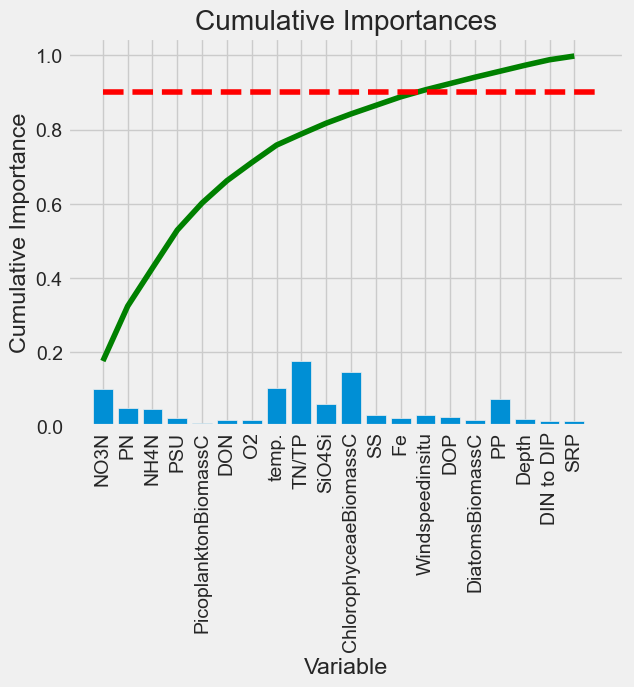

In [36]:
plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))  # list of x locations for plotting

plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

cumulative_importances = np.cumsum(sorted_importances)

plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y=0.90, xmin=0, xmax=len(sorted_importances), color='r', linestyles='dashed') # draw line at 90% of importance retained

plt.xticks(x_values, sorted_features, rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

## Features accounting for 90% of total importance

In [39]:
important_feature_names = ['NO3N', 'PN', 'NH4N', 'PSU', 'PicoplanktonBiomassC', 'DON', 'O2', 'temp.', 'TN/TP', 'SiO4Si', 'ChlorophyceaeBiomassC','SS', 'Fe']

In [40]:
important_indices = [feature_list.index(feature) for feature in important_feature_names]

In [41]:
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

In [42]:
print(f'Important train features shape: {important_train_features.shape}')
print(f'Important test features shape: {important_test_features.shape}')

Important train features shape: (109, 13)
Important test features shape: (47, 13)


In [43]:
# Use only the most important features
train_features = important_train_features[:]
test_features = important_test_features[:]

In [44]:
feature_list = important_feature_names[:]

In [45]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [46]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print(f'Test dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees.')

Test dataset Mean Absolute Error: 0.33651 degrees.


In [47]:
ratio = 100 * (np.mean(errors) / test_labels.mean())
print(f'Test dataset MAE/mean Ratio: {round(ratio, 5)} %.')

Test dataset MAE/mean Ratio: 47.18076 %.


In [48]:
mse_test = mean_squared_error(test_labels, predictions)
print(f'Test dataset Mean Squared Error: {round(mse_test, 5)} degrees.')

Test dataset Mean Squared Error: 0.24473 degrees.


In [49]:
EVS = 100 * (explained_variance_score(test_labels, predictions))
print(f'Test dataset Explained Variance Score: {round(EVS, 5)} %.')

Test dataset Explained Variance Score: 13.59161 %.


In [50]:
mape = 100 * (errors / test_labels)
print(f'Test dataset MAPE: {round(np.mean(mape), 3)} %.')

Test dataset MAPE: 63.545 %.


In [51]:
accuracy = 100 - np.mean(mape)
print(f'Test dataset Accuracy: {round(accuracy, 2)} %.')

Test dataset Accuracy: 36.45 %.


In [52]:
predictions = rf.predict(train_features)
errors = abs(predictions - train_labels)
print(f'Train dataset Mean Absolute Error: {round(np.mean(errors), 5)} degrees.')

Train dataset Mean Absolute Error: 0.10332 degrees.


In [53]:
ratio = 100 * (np.mean(errors) / train_labels.mean())
print(f'Train dataset MAE/mean Ratio: {round(ratio, 5)} %.')

Train dataset MAE/mean Ratio: 14.58407 %.


In [54]:
mse_train = mean_squared_error(train_labels, predictions)
print(f'Train dataset Mean Squared Error: {round(mse_train, 5)} degrees.')

Train dataset Mean Squared Error: 0.02251 degrees.


In [55]:
EVS = 100 * (explained_variance_score(train_labels, predictions))
print(f'Train dataset Explained Variance Score: {round(EVS, 5)} %.')

Train dataset Explained Variance Score: 91.94049 %.


In [56]:
mape = 100 * (errors / train_labels)
print(f'Train dataset MAPE: {round(np.mean(mape), 3)} %.')

Train dataset MAPE: 27.968 %.


In [57]:
accuracy = 100 - np.mean(mape)
print(f'Train dataset Accuracy: {round(accuracy, 2)} %.')

Train dataset Accuracy: 72.03 %.


### Visualization

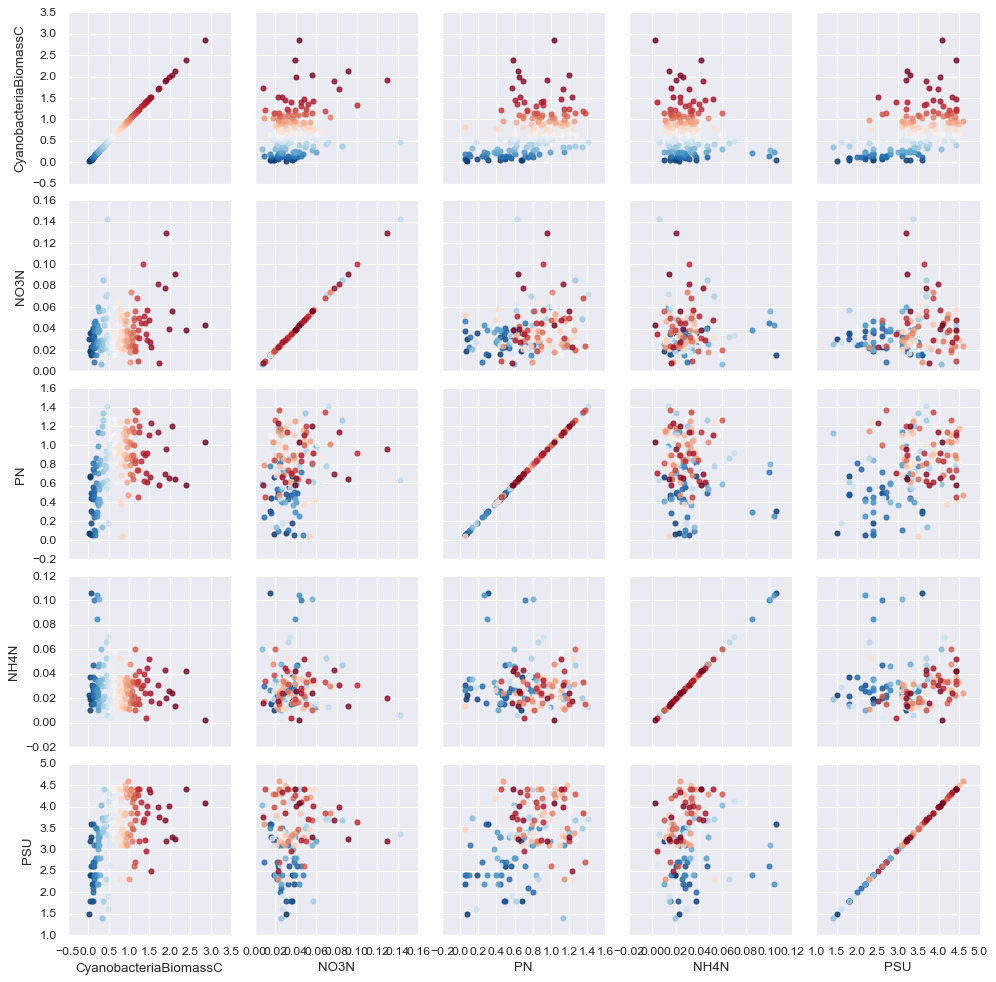

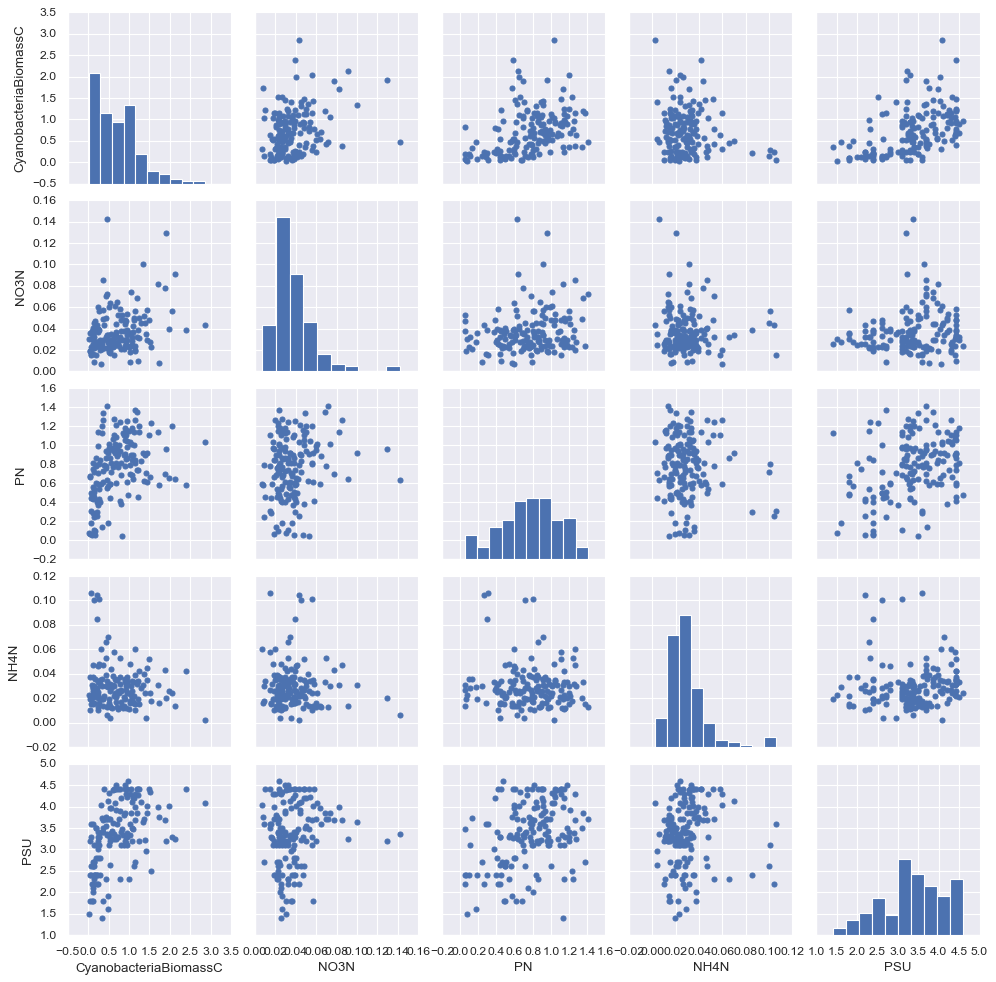

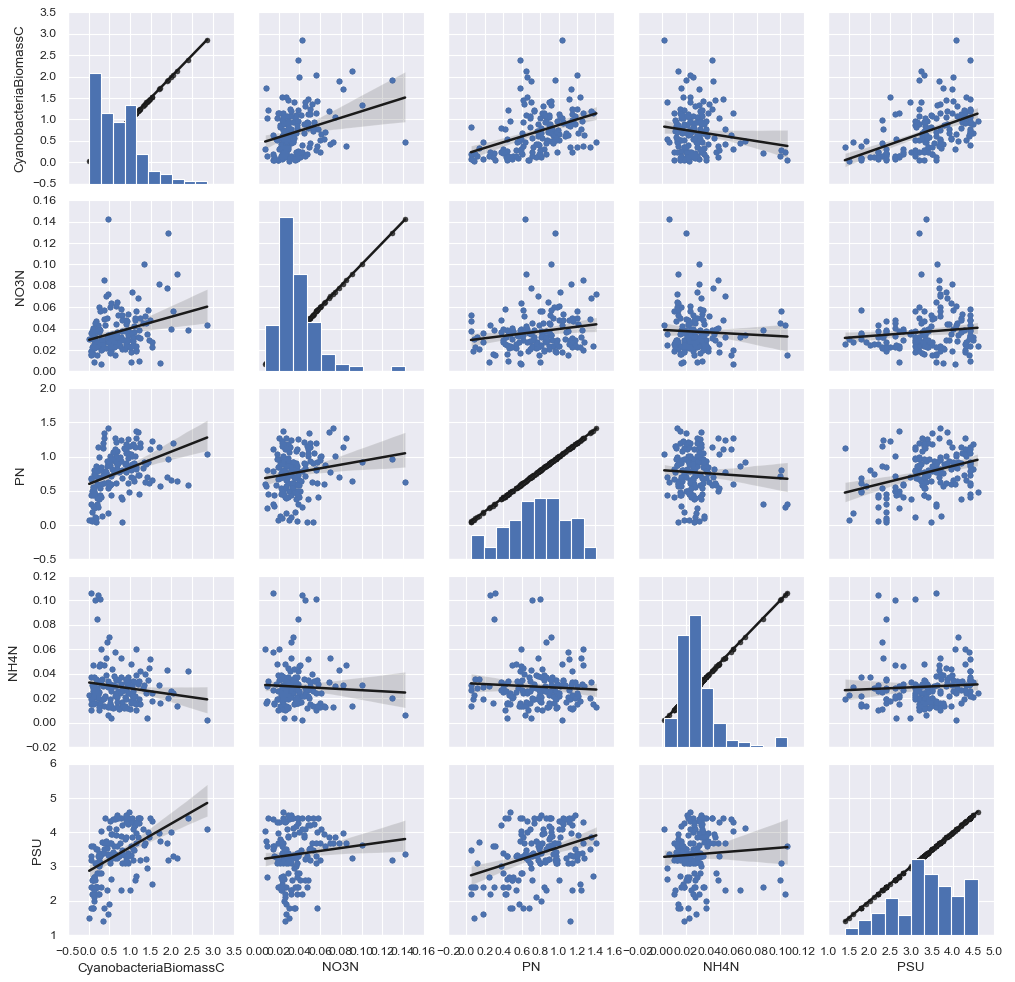

In [60]:
plt.style.use('classic')
sns.set()

data = pd.read_csv('D:/Projekty/DataScientistWorkshop/lab_11/files/vlagunr-Cyano.csv')
data.head()

vars = ['CyanobacteriaBiomassC', 'NO3N', 'PN', 'NH4N', 'PSU']
df = pd.DataFrame(vars, columns=['Column_Name'])

g = sns.PairGrid(data, vars=['CyanobacteriaBiomassC', 'NO3N', 'PN', 'NH4N', 'PSU'], hue='CyanobacteriaBiomassC', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)

g = sns.PairGrid(data, vars=['CyanobacteriaBiomassC', 'NO3N', 'PN', 'NH4N', 'PSU'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

g = sns.PairGrid(data, vars=['CyanobacteriaBiomassC', 'NO3N', 'PN', 'NH4N', 'PSU'])
g = g.map(sns.regplot, color=".1")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

g.add_legend()

In [63]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3, min_samples_leaf=16)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file='small_tree2.dot', feature_names=important_feature_names, rounded=True, precision=3)

![Tree graph](small_tree2.png)

In [64]:
rf = RandomForestRegressor(random_state=42)
print(f'Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Cross Validation - Randomized Search

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]  # number of trees in random forest
max_features = ['sqrt', 'log2']  # number of features to consider at every split
# max_features = ['auto', 'sqrt'] causes error:
# The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]  # maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10]  # minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]  # minimum number of samples required at each leaf node
bootstrap = [True, False]  # method of selecting samples for training each tree

# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [66]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [67]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    ratio = 100 * (np.mean(errors) / test_labels.mean())
    mse_test = mean_squared_error(test_labels, predictions)
    EVS = 100 * (explained_variance_score(test_labels, predictions))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Test dataset Model Performance')
    print('Test dataset Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Test dataset MAE mean Ratio: {:0.4f}%.'.format(ratio))
    print('Test dataset Mean Squared Error: {:0.4f} degrees.'.format(mse_test))
    print('Test dataset Explained Variance Score: {:0.2f}%.'.format(EVS))
    print('Test dataset Accuracy: {:0.2f}%.'.format(accuracy))

In [68]:
base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(train_features, train_labels)

base_ratio = evaluate(base_model, test_features, test_labels)
base_mse_test = evaluate(base_model, test_features, test_labels)
base_EVS = evaluate(base_model, test_features, test_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_

random_ratio = evaluate(best_random, test_features, test_labels)
random_mse_test = evaluate(best_random, test_features, test_labels)
random_EVS = evaluate(best_random, test_features, test_labels)
random_accuracy = evaluate(best_random, test_features, test_labels)

Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3530 degrees.
Test dataset MAE mean Ratio: 49.4994%.
Test dataset Mean Squared Error: 0.2671 degrees.
Test dataset Explained Variance Score: 6.40%.
Test dataset Accuracy: 37.15%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3530 degrees.
Test dataset MAE mean Ratio: 49.4994%.
Test dataset Mean Squared Error: 0.2671 degrees.
Test dataset Explained Variance Score: 6.40%.
Test dataset Accuracy: 37.15%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3530 degrees.
Test dataset MAE mean Ratio: 49.4994%.
Test dataset Mean Squared Error: 0.2671 degrees.
Test dataset Explained Variance Score: 6.40%.
Test dataset Accuracy: 37.15%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3530 degrees.
Test dataset MAE mean Ratio: 49.4994%.
Test dataset Mean Squared Error: 0.2671 degrees.
Test dataset Explained Variance Score: 6.40%.
Test dataset Accuracy: 37.15%.
Test dataset Mod

In [69]:
def evaluate(model, train_features, train_labels):
    predictions = model.predict(train_features)
    errors = abs(predictions - train_labels)
    ratio = 100 * (np.mean(errors) / train_labels.mean())
    mse_test = mean_squared_error(train_labels, predictions)
    EVS = 100 * (explained_variance_score(train_labels, predictions))
    mape = 100 * np.mean(errors / train_labels)
    accuracy = 100 - mape
    print('Train dataset Model Performance')
    print('Train dataset Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Train dataset MAE/mean Ratio: {:0.4f}%.'.format(ratio))
    print('Train dataset Mean Squared Error: {:0.4f} degrees.'.format(mse_test))
    print('Train dataset Explained Variance Score: {:0.2f}%.'.format(EVS))
    print('Train dataset Accuracy: {:0.2f}%.'.format(accuracy))


base_model = RandomForestRegressor(n_estimators=10, random_state=42)
base_model.fit(train_features, train_labels)

base_ratio = evaluate(base_model, train_features, train_labels)
base_mse_test = evaluate(base_model, train_features, train_labels)
base_EVS = evaluate(base_model, train_features, train_labels)
base_accuracy = evaluate(base_model, train_features, train_labels)

best_random = rf_random.best_estimator_

random_ratio = evaluate(best_random, train_features, train_labels)
random_mse_test = evaluate(best_random, train_features, train_labels)
random_EVS = evaluate(best_random, train_features, train_labels)
random_accuracy = evaluate(best_random, train_features, train_labels)

Train dataset Model Performance
Train dataset Mean Absolute Error: 0.1195 degrees.
Train dataset MAE/mean Ratio: 16.8628%.
Train dataset Mean Squared Error: 0.0368 degrees.
Train dataset Explained Variance Score: 86.95%.
Train dataset Accuracy: 70.48%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.1195 degrees.
Train dataset MAE/mean Ratio: 16.8628%.
Train dataset Mean Squared Error: 0.0368 degrees.
Train dataset Explained Variance Score: 86.95%.
Train dataset Accuracy: 70.48%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.1195 degrees.
Train dataset MAE/mean Ratio: 16.8628%.
Train dataset Mean Squared Error: 0.0368 degrees.
Train dataset Explained Variance Score: 86.95%.
Train dataset Accuracy: 70.48%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.1195 degrees.
Train dataset MAE/mean Ratio: 16.8628%.
Train dataset Mean Squared Error: 0.0368 degrees.
Train dataset Explained Variance Score: 86.95%.
Train dataset Accura

## Cross Validation - Grid Search

In [70]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 800, 2000]    
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500, 800, 2000]},
             verbose=2)

In [71]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    ratio = 100 * (np.mean(errors) / test_labels.mean())
    mse_test = mean_squared_error(test_labels, predictions)
    EVS = 100 * (explained_variance_score(test_labels, predictions))
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Test dataset Model Performance')
    print('Test dataset Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Test dataset MAE/mean Ratio: {:0.4f}%.'.format(ratio))
    print('Test dataset Mean Squared Error: {:0.4f} degrees.'.format(mse_test))
    print('Test dataset Explained Variance Score: {:0.2f}%.'.format(EVS))
    print('Test dataset Accuracy: {:0.2f}%.'.format(accuracy))


grid_ratio = evaluate(best_random, test_features, test_labels)
grid_mse_test = evaluate(best_random, test_features, test_labels)
grid_EVS = evaluate(best_random, test_features, test_labels)
grid_accuracy = evaluate(best_random, test_features, test_labels)

Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3348 degrees.
Test dataset MAE/mean Ratio: 46.9446%.
Test dataset Mean Squared Error: 0.2381 degrees.
Test dataset Explained Variance Score: 16.26%.
Test dataset Accuracy: 35.73%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3348 degrees.
Test dataset MAE/mean Ratio: 46.9446%.
Test dataset Mean Squared Error: 0.2381 degrees.
Test dataset Explained Variance Score: 16.26%.
Test dataset Accuracy: 35.73%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3348 degrees.
Test dataset MAE/mean Ratio: 46.9446%.
Test dataset Mean Squared Error: 0.2381 degrees.
Test dataset Explained Variance Score: 16.26%.
Test dataset Accuracy: 35.73%.
Test dataset Model Performance
Test dataset Mean Absolute Error: 0.3348 degrees.
Test dataset MAE/mean Ratio: 46.9446%.
Test dataset Mean Squared Error: 0.2381 degrees.
Test dataset Explained Variance Score: 16.26%.
Test dataset Accuracy: 35.73%.


In [72]:
def evaluate(model, train_features, train_labels):
    predictions = model.predict(train_features)
    errors = abs(predictions - train_labels)
    ratio = 100 * (np.mean(errors) / train_labels.mean())
    mse_test = mean_squared_error(train_labels, predictions)
    EVS = 100 * (explained_variance_score(train_labels, predictions))
    mape = 100 * np.mean(errors / train_labels)
    accuracy = 100 - mape
    print('Train dataset Model Performance')
    print('Train dataset Mean Absolute Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Train dataset MAE/mean Ratio: {:0.4f}%.'.format(ratio))
    print('Train dataset Mean Squared Error: {:0.4f} degrees.'.format(mse_test))
    print('Train dataset Explained Variance Score: {:0.2f}%.'.format(EVS))
    print('Train dataset Accuracy: {:0.2f}%.'.format(accuracy))


grid_ratio = evaluate(best_random, train_features, train_labels)
grid_mse_test = evaluate(best_random, train_features, train_labels)
grid_EVS = evaluate(best_random, train_features, train_labels)
grid_accuracy = evaluate(best_random, train_features, train_labels)

Train dataset Model Performance
Train dataset Mean Absolute Error: 0.0000 degrees.
Train dataset MAE/mean Ratio: 0.0000%.
Train dataset Mean Squared Error: 0.0000 degrees.
Train dataset Explained Variance Score: 100.00%.
Train dataset Accuracy: 100.00%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.0000 degrees.
Train dataset MAE/mean Ratio: 0.0000%.
Train dataset Mean Squared Error: 0.0000 degrees.
Train dataset Explained Variance Score: 100.00%.
Train dataset Accuracy: 100.00%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.0000 degrees.
Train dataset MAE/mean Ratio: 0.0000%.
Train dataset Mean Squared Error: 0.0000 degrees.
Train dataset Explained Variance Score: 100.00%.
Train dataset Accuracy: 100.00%.
Train dataset Model Performance
Train dataset Mean Absolute Error: 0.0000 degrees.
Train dataset MAE/mean Ratio: 0.0000%.
Train dataset Mean Squared Error: 0.0000 degrees.
Train dataset Explained Variance Score: 100.00%.
Train dataset Acc